In [4]:
# On applique les mêmes réflexions pour la classification multi-classe que pour la classification binaire
# En appliquant les méthodes d'évaluations matrice de confusion et rapport de classification
# au jeu de données digit contenant 10 chiffres manuscrits
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split( digits.data, digits.target, random_state=0 )
lr = LogisticRegression(solver='liblinear').fit(X_train,y_train)
pred = lr.predict(X_test)
print("Accuracy : {:.3f}".format(accuracy_score(y_test,pred)))
print("Confusion Matrix : \n{}".format(confusion_matrix(y_test,pred)))

Accuracy : 0.953
Confusion Matrix : 
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


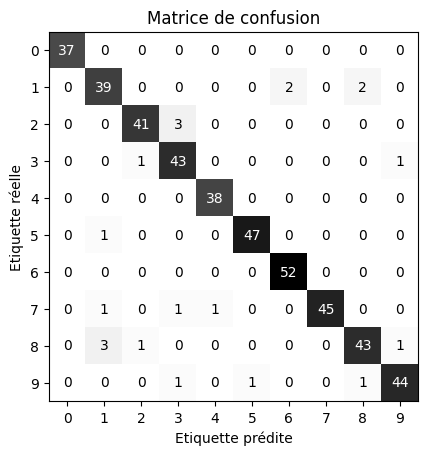

In [7]:
# plus visuel 
import mglearn
import matplotlib.pyplot as plt

scores_image = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Etiquette prédite',
ylabel='Etiquette réelle', xticklabels=digits.target_names,
yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Matrice de confusion")
plt.gca().invert_yaxis()

In [10]:
# Calcul de la précision/rappel/f-mesure par classification _report
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [11]:
# On distingue 3 stratégie d'application de moyenne dans le calcul f1-score :
# on calcule le f1-score en mode binaire ( apppartient à la classe recherchée ou pas [ toutes les autres ] )
# pour chaque classe et 
# - on moyenne arithmétique à niveau égal pour chaque classe (macro)
# - on moyenne dans le rapport du support (pondéré, celui affiché ci-dessus)
# - on moyenne les résultats de faux/vrais positifs et faux négatifs pour chaque classe et on recalcul précision/rappel et f1-score

from sklearn.metrics import f1_score
print("Macro moyenne pour le score f1 : {:.3f}".format(f1_score(y_test,pred, average='macro')))
print("Micro moyenne pour le score f1 : {:.3f}".format(f1_score(y_test,pred, average='micro')))

Macro moyenne pour le score f1 : 0.954
Micro moyenne pour le score f1 : 0.953
